<a href="https://colab.research.google.com/github/Hooni98/2020_11_10_1_python_ML_V.1.0.0/blob/main/%EC%9E%90%EC%97%B0%EC%96%B4%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### git clone으로 데이터 가져오기

In [ ]:
!git clone https://github.com/ZIZUN/korean-malicious-comments-dataset.git

Cloning into 'korean-malicious-comments-dataset'...
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 30 (delta 15), reused 15 (delta 5), pack-reused 0
Unpacking objects: 100% (30/30), done.


In [ ]:
!pip install Konlpy
# !pip install lime

     |████████████████████████████████| 19.4 MB 106.7 MB/s 
     |████████████████████████████████| 86 kB 6.2 MB/s 
     |████████████████████████████████| 448 kB 70.8 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


### 0. 모듈 임포트

In [ ]:
import pandas as pd # 판다스
import tensorflow as tf # 텐서플로우
import numpy as np # 넘파이
from konlpy.tag import Okt # 형태소 태깅
from konlpy.tag import Twitter # 형태소 태깅
from tensorflow.keras.preprocessing.text import Tokenizer # 토큰화
from tensorflow.keras.preprocessing.sequence import pad_sequences # 모든 벡터의 길이를 맞추기

### 1. 데이터 불러오기

In [ ]:
def load_dataset():
  data2 = pd.read_csv('/content/korean-malicious-comments-dataset/Dataset.csv',sep='\t')
  data = data2
  return data

In [ ]:
data = load_dataset()

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   content  10000 non-null  object 
 1   lable    9975 non-null   float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


### 2. 데이터 전처리

In [ ]:
data.tail(5)

,content,lable
9995,이거 보다 더한 막장의 드라마도 넋놓고 보면서 무슨?,1.0
9996,머...제네시스..올라프에디션?,1.0
9997,항상 여자로 ㅡ ㅡ 저지랄 들이야 남자들 벗겨봐라,0.0
9998,첫번째 이유가 ㄹㅇ 맞지특히나 뉴스나 기사 몇줄읽은 학생들끼리 대화해도 서로 존나 ...,0.0
9999,Lg폰 누가쓰냐 gps도 못잡는폰 쓰래기 통에나 버려라,0.0


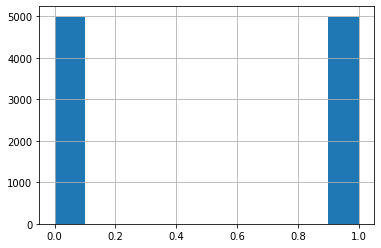

In [ ]:
data['lable'].hist()

In [ ]:
data = data.dropna(how = 'any')

print(data.isnull().sum())

content    0
lable      0
dtype: int64


### 3. 품사 태깅

In [ ]:
data['content'] = data['content'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
# 한글과 공백을 제외하고 제거
data[8:12]

,content,lable
8,어린시절 가정교육 못 받은 애들은 절대 그 본성을 숨길수없지,0.0
9,지연이 얼굴은 더 배우같네,1.0
10,건축학 개론 지금 다시 봤는데 솔직히 건축학 개론 보다는 아닙니다ㅋ 건축학 개론은 ...,1.0
11,개별 공무원 뷰웅들의 헷지랄에 뭔 청와대까지 들먹이는지 빠끄네 때도 순시리가 개뻘짓...,0.0


In [ ]:
okt = Okt()
twit = Twitter()
text = 'RNN기반 한국어 노래가사 생성기를 만들어보자! '
print(okt.morphs(text, stem= True))
print(twit.morphs(text, stem = True))

/usr/local/lib/python3.7/dist-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


['RNN', '기반', '한국어', '노래', '가사', '생', '성기', '를', '만들다', '보다', '!']
['RNN', '기반', '한국어', '노래', '가사', '생', '성기', '를', '만들다', '보다', '!']


In [ ]:
train_data = []
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다'] # 불용어 정리 더 늘릴수도 있어요!
for sentence in data['content']:
  temp_X = okt.morphs(sentence, stem= True) # 토큰화, stem
  temp_X = [word for word in temp_X if not word in stopwords]
  train_data.append(temp_X)

In [ ]:
train_data

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data)
# 각 단어에 고유한 정수값 부여

In [ ]:
print(tokenizer.word_index)

# 빈도수가 많으면 정수 인코딩 숫자가 작음

{'보다': 1, '을': 2, 'ㅋㅋ': 3, '있다': 4, '아니다': 5, '되다': 6, '다': 7, '같다': 8, '없다': 9, '로': 10, '안': 11, '좋다': 12, '이다': 13, '만': 14, '못': 15, '에서': 16, '사람': 17, '아': 18, '고': 19, '진짜': 20, '들다': 21, '나': 22, '새끼': 23, '왜': 24, '그렇다': 25, '네': 26, '그': 27, '여자': 28, '하고': 29, '나오다': 30, '저': 31, '니': 32, '너무': 33, '말': 34, '게': 35, 'ㅋㅋㅋ': 36, '가다': 37, '먹다': 38, '더': 39, '지': 40, '거': 41, '년': 42, '개': 43, '면': 44, '뭐': 45, '것': 46, '적': 47, '인': 48, '야': 49, '때': 50, '치다': 51, '않다': 52, '많다': 53, '라': 54, '그냥': 55, '애': 56, '내': 57, '돈': 58, '알다': 59, '남자': 60, '받다': 61, '생각': 62, '인데': 63, '오다': 64, '모르다': 65, '지다': 66, '이쁘다': 67, '한테': 68, '놈': 69, '맞다': 70, '까지': 71, '일': 72, '자다': 73, '하': 74, '이나': 75, '또': 76, 'ㅋ': 77, '병신': 78, '임': 79, '존나': 80, '이렇다': 81, '랑': 82, '씨': 83, '보고': 84, '살다': 85, '해주다': 86, '냐': 87, '기사': 88, '한국': 89, '정말': 90, '요': 91, '님': 92, '안되다': 93, '서': 94, '너': 95, '나다': 96, '만들다': 97, '넘다': 98, '주다': 99, '쓰레기': 100, '들이다': 101, '나라': 102, '쓰다': 103, '차다': 1

In [ ]:
threshold = 3
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value


print('단어 집합의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)
# 10% 정도면 그냥 다 쓰자

단어 집합의 크기 : 15320
등장 빈도가 2번 이하인 희귀 단어의 수: 9716
단어 집합에서 희귀 단어의 비율: 63.420365535248045
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 9.234621050783545


In [ ]:
vocab_size = total_cnt
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 15320


In [ ]:
print("평균 길이 :",sum(map(len, train_data))/len(train_data))

평균 길이 : 13.133533834586466


### - 인코딩 및 벡터화

In [ ]:
tokenizer = Tokenizer(vocab_size) #num_words = vocab_size
tokenizer.fit_on_texts(train_data)
train_data = tokenizer.texts_to_sequences(train_data)

In [ ]:
print(train_data[:3])

[[2396, 1675, 30, 122, 879, 10, 122, 11, 1, 42, 5605, 1955, 111, 81, 4369, 455, 122, 558, 196, 1, 44, 2681, 1, 46, 13, 835, 47, 48, 17, 1080, 2, 559, 6], [83, 5606, 1382, 1382, 7987, 283, 3057, 2138, 7988, 13, 2397], [427, 149, 456, 5607]]


In [ ]:
drop_train = [index for index, setence in enumerate(train_data) if len (sentence) < 1]
# 혹시 모를 결측값 제거

In [ ]:
train_data = np.delete(train_data, drop_train, axis=0)
print(len(train_data))

9975


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [ ]:
max_len = 30
X_train = pad_sequences(train_data, maxlen = max_len) # 모든 벡터 길이를 30으로 맞춘다.

In [ ]:
train_y = np.array(data['lable'])

### 4. 모델 구축 및 학습(CNN_RES)

In [ ]:
from tensorflow.keras.layers import Embedding, Dense,Dropout,Conv1D, GlobalMaxPooling1D,MaxPool1D, add
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow import keras

# ----------------------------------------------------------------------------------------------------------------------- #
text_input = keras.Input(shape=(None,), name="my_text")
text_features = Embedding(vocab_size, 32)(text_input)
text_features = Conv1D(128,3, padding='same', activation = 'relu')(text_features)
text_features = Conv1D(128,4, padding = 'same', activation='relu')(text_features)
text_features = Conv1D(128,5, padding = 'same', activation='relu')(text_features)
Maxpool_layer = MaxPool1D(2)(text_features)

text_features1 = Conv1D(128,3, padding="same", activation="relu")(Maxpool_layer)
text_features1 = Conv1D(128,4, padding="same", activation="relu")(text_features1)
text_features1 = Conv1D(128,5, padding = 'same', activation='relu')(text_features1)
block_1_output = add([Maxpool_layer, text_features1])


Maxpool_layer1 = MaxPool1D(2)(block_1_output)
text_features2 = Conv1D(128,3, padding="same", activation="relu")(Maxpool_layer1)
text_features2 = Conv1D(128,4, padding="same", activation="relu")(text_features2)
text_features2 = Conv1D(128,5, padding = 'same', activation='relu')(text_features2)
block_add = add([text_features2, Maxpool_layer1])

Maxpool_layer2 = MaxPool1D(2)(block_add)
text_features3 = Conv1D(128,3, padding="same", activation="relu")(Maxpool_layer2)
text_features3 = Conv1D(128,4, padding="same", activation="relu")(text_features3)
text_features3 = Conv1D(128,5, padding = 'same', activation='relu')(text_features3)
block_add1 = add([Maxpool_layer2,text_features3])

Maxpool_layer3 = MaxPool1D(2)(block_add1)
text_features4 = Conv1D(128,3, padding="same", activation="relu")(Maxpool_layer3)
text_features4 = Conv1D(128,4, padding="same", activation="relu")(text_features4)
text_features4 = Conv1D(128,5, padding = 'same', activation='relu')(text_features4)
block_add2 = add([Maxpool_layer3,text_features4])

text_features5 = Dense(64, activation = 'relu')(block_add2)
text_features5 = Dense(32, activation = 'relu')(text_features5)
text_features5 = Dense(16, activation = 'relu')(text_features5)
outputs = Dense(1,activation='sigmoid')(text_features5)

model = keras.Model(text_input, outputs, name="text_resnet_cnn")


es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True) # 가장 좋은 모델만 저장

Adam = tf.keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
from tensorflow import keras
keras.utils.plot_model(model, "my_first_model_with_shape_info.png", show_shapes=True)

In [ ]:
history = model.fit(X_train, train_y, epochs=15, callbacks=[es, mc], batch_size=30, validation_split=0.2)

Epoch 1/15
266/266 [==============================] - 21s 69ms/step - loss: 0.5594 - acc: 0.6939 - val_loss: 0.4035 - val_acc: 0.8201

Epoch 00001: val_acc improved from -inf to 0.82005, saving model to best_model.h5
Epoch 2/15
  1/266 [..............................] - ETA: 14s - loss: 0.2881 - acc: 0.9000

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


266/266 [==============================] - 17s 63ms/step - loss: 0.2763 - acc: 0.8936 - val_loss: 0.3732 - val_acc: 0.8351

Epoch 00002: val_acc improved from 0.82005 to 0.83509, saving model to best_model.h5
Epoch 3/15
266/266 [==============================] - 17s 63ms/step - loss: 0.1190 - acc: 0.9583 - val_loss: 0.4242 - val_acc: 0.8376

Epoch 00003: val_acc improved from 0.83509 to 0.83759, saving model to best_model.h5
Epoch 4/15
266/266 [==============================] - 17s 64ms/step - loss: 0.0567 - acc: 0.9811 - val_loss: 0.5850 - val_acc: 0.8281

Epoch 00004: val_acc did not improve from 0.83759
Epoch 5/15
266/266 [==============================] - 17s 64ms/step - loss: 0.0303 - acc: 0.9914 - val_loss: 0.7411 - val_acc: 0.8296

Epoch 00005: val_acc did not improve from 0.83759
Epoch 6/15
266/266 [==============================] - 17s 64ms/step - loss: 0.0271 - acc: 0.9922 - val_loss: 0.7795 - val_acc: 0.8241

Epoch 00006: val_acc did not improve from 0.83759
Epoch 00006: ear

In [ ]:
loaded_model = load_model('best_model.h5')

### 6. 검증 및 배포

In [ ]:
def sentiment_predict(new_sentence):
  new_sentence = okt.morphs(new_sentence, stem=True) # 토큰화
  new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
  encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
  pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
  score = float(loaded_model.predict(pad_new)) # 예측
  if(score > 0.5):
    print("{:.2f}% 확률로 욕이 아닙니다.\n".format(score * 100))
  else:
    print("{:.2f}% 확률로 욕 입니다.\n".format((1 - score) * 100))

### 마스킹 함수 정의(LIME)

In [ ]:
def mask(text):
  return_text = text.split(" ")
  texts = text
  texts = okt.morphs(texts, stem=True) # 토큰화
  texts = [word for word in texts if not word in stopwords] # 불용어 제거
  seq = tokenizer.texts_to_sequences([texts])
  text_data = pad_sequences(seq, maxlen=max_len)
  a = loaded_model.predict(text_data)

  for i in range(len(a)):
    if a[i] < 0.5:
      return_text[i] = return_text[i].replace(return_text[i], "*" * len(return_text[i]))
  s = " ".join(return_text)
  return s

In [ ]:
sentence = "새끼야"

sentiment_predict(sentence)
mask(sentence)

99.05% 확률로 욕 입니다.



'***'

### 배포 프로토타입

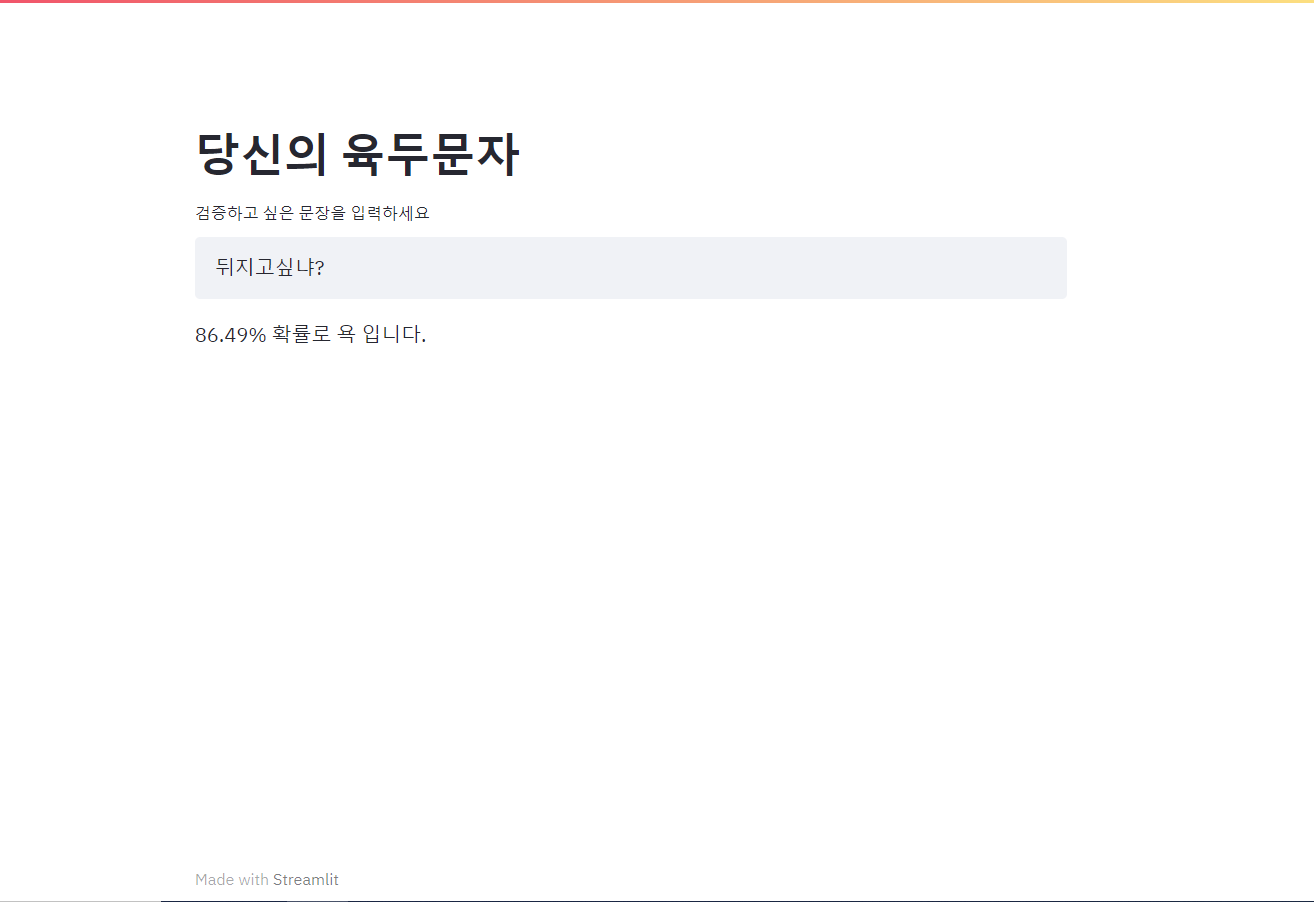